In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
import requests
from urllib.parse import urlparse
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_path = './NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=font_path, size=18)
import seaborn as sns
import shap

In [2]:
%%time
# Read Data
basedir = './Training/training_data_ver_16/'
training_data_df = pd.read_csv(basedir + 'top22_ordinal.csv')
print(training_data_df.shape)
training_data_df.head()

(3843141, 23)
Wall time: 6.45 s


,trade_type,토지면적over총연면적times공시지가,year_linear,건축년도,전용면적,ynorm,xy,x_2nd,층mean,주건축물수,총건축면적,호수대비연면적,토지이동상황,xnorm,아파트지구,옥내자주식대수,호수대비부속건축물면적,총호수,층,y_2nd,호수대비주차수,용도지역명1,target_area_log
0,0,202.216536,7.666667,1988,77.75,-9048.956121,-5.048499e+07,1.556315e+07,9.0,1.0,6.27131,98.537963,0,5579.095707,0,0.0,0.0,54.0,2,4.094180e+07,0.0,0,6.597308
1,0,202.216536,7.916667,1988,77.75,-9048.956121,-5.048499e+07,1.556315e+07,9.0,1.0,6.27131,98.537963,0,5579.095707,0,0.0,0.0,54.0,2,4.094180e+07,0.0,0,6.597308
2,1,202.216536,7.000000,1988,77.75,-9048.956121,-5.048499e+07,1.556315e+07,9.0,1.0,6.27131,98.537963,0,5579.095707,0,0.0,0.0,54.0,4,4.094180e+07,0.0,0,6.109605
3,1,202.216536,7.166667,1988,77.75,-9048.956121,-5.048499e+07,1.556315e+07,9.0,1.0,6.27131,98.537963,0,5579.095707,0,0.0,0.0,54.0,9,4.094180e+07,0.0,0,6.019993
4,1,202.216536,7.666667,1988,77.75,-9048.956121,-5.048499e+07,1.556315e+07,9.0,1.0,6.27131,98.537963,0,5579.095707,0,0.0,0.0,54.0,1,4.094180e+07,0.0,0,6.165175


# Training

In [3]:
from sklearn.model_selection import KFold, GroupKFold

In [4]:
import lightgbm as lgb

In [5]:
from sklearn.metrics import r2_score

In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
# Next things to do:
# 1. Do Variance Inflation Factor (VIF) analysis.
# 2. keep the feature with the highest shap value
# 3. Retrain
# 4. Remove 1 feature at a time and find out the set of feature with the lowest loss.
# 5. Retrain
# 6. Continue production prep

In [9]:
target_cols = ['target_area_log']

In [10]:
cat_cols_df = pd.read_csv(basedir + 'ordinal_cat_cols.csv')
cat_cols_df

,colnames
0,trade_type
1,용도지역명1
2,토지이동상황
3,아파트지구


In [11]:
cat_cols = cat_cols_df['colnames'].tolist()
cat_cols

['trade_type', '용도지역명1', '토지이동상황', '아파트지구']

Fold 0 start
(3074512, 22)
y dist plot


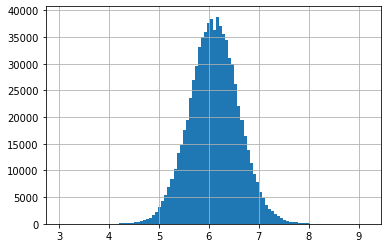

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3941
[LightGBM] [Info] Number of data points in the train set: 3074512, number of used features: 22
[LightGBM] [Info] Start training from score 6.108187
Training until validation scores don't improve for 100 rounds
[50]	valid_0's huber: 0.0175634
[100]	valid_0's huber: 0.0155347
[150]	valid_0's huber: 0.0144125
[200]	valid_0's huber: 0.0136624
[250]	valid_0's huber: 0.0130862
[300]	valid_0's huber: 0.0126451
[350]	valid_0's huber: 0.012281
[400]	valid_0's huber: 0.0120235
[450]	valid_0's huber: 0.0117755
[500]	valid_0's huber: 0.0115742
[550]	valid_0's huber: 0.0114042
[600]	valid_0's huber: 0.0112371
[650]	valid_0's huber: 0.0110844
[700]	valid_0's huber: 0.0109606
[750]	valid_0's huber: 0.0108373
[800]	valid_0's huber: 0.0107314
[

[11200]	valid_0's huber: 0.00819724
[11250]	valid_0's huber: 0.00819601
[11300]	valid_0's huber: 0.00819504
[11350]	valid_0's huber: 0.00819453
[11400]	valid_0's huber: 0.00819248
[11450]	valid_0's huber: 0.00819081
[11500]	valid_0's huber: 0.00818858
[11550]	valid_0's huber: 0.00818795
[11600]	valid_0's huber: 0.00818699
[11650]	valid_0's huber: 0.00818577
[11700]	valid_0's huber: 0.00818494
[11750]	valid_0's huber: 0.00818443
[11800]	valid_0's huber: 0.00818374
[11850]	valid_0's huber: 0.00818203
[11900]	valid_0's huber: 0.00818043
[11950]	valid_0's huber: 0.00817934
[12000]	valid_0's huber: 0.00817762
[12050]	valid_0's huber: 0.00817616
[12100]	valid_0's huber: 0.00817591
[12150]	valid_0's huber: 0.00817436
[12200]	valid_0's huber: 0.00817378
[12250]	valid_0's huber: 0.00817386
[12300]	valid_0's huber: 0.00817262
[12350]	valid_0's huber: 0.00817202
[12400]	valid_0's huber: 0.00817182
[12450]	valid_0's huber: 0.00817136
[12500]	valid_0's huber: 0.00817014
[12550]	valid_0's huber: 0.0

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


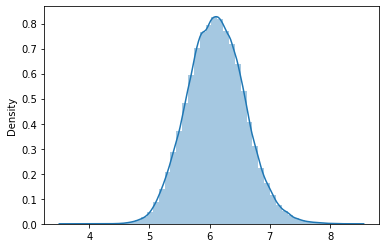

0.1277813853837164
Fold 0 end
Fold 1 start
(3074513, 22)
y dist plot


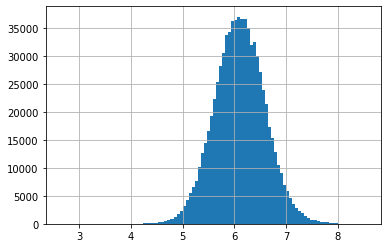

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3945
[LightGBM] [Info] Number of data points in the train set: 3074513, number of used features: 22


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6.108200
Training until validation scores don't improve for 100 rounds
[50]	valid_0's huber: 0.0174632
[100]	valid_0's huber: 0.0153011
[150]	valid_0's huber: 0.0142085
[200]	valid_0's huber: 0.0134824
[250]	valid_0's huber: 0.0129591
[300]	valid_0's huber: 0.0125143
[350]	valid_0's huber: 0.0121878
[400]	valid_0's huber: 0.0119391
[450]	valid_0's huber: 0.0117177
[500]	valid_0's huber: 0.0115142
[550]	valid_0's huber: 0.0113377
[600]	valid_0's huber: 0.0111731
[650]	valid_0's huber: 0.0110355
[700]	valid_0's huber: 0.0109106
[750]	valid_0's huber: 0.0107965
[800]	valid_0's huber: 0.0106877
[850]	valid_0's huber: 0.0105862
[900]	valid_0's huber: 0.0105094
[950]	valid_0's huber: 0.010432
[1000]	valid_0's huber: 0.0103577
[1050]	valid_0's huber: 0.0102852
[1100]	valid_0's huber: 0.0102154
[1150]	valid_0's huber: 0.0101533
[1200]	valid_0's huber: 0.0100953
[1250]	valid_0's huber: 0.0100378
[1300]	valid_0's huber: 0.0099927
[1350]	valid_0's huber

[11650]	valid_0's huber: 0.00819402
[11700]	valid_0's huber: 0.00819321
[11750]	valid_0's huber: 0.0081928
[11800]	valid_0's huber: 0.0081916
[11850]	valid_0's huber: 0.00819049
[11900]	valid_0's huber: 0.00818897
[11950]	valid_0's huber: 0.00818835
[12000]	valid_0's huber: 0.00818826
[12050]	valid_0's huber: 0.00818781
[12100]	valid_0's huber: 0.00818691
[12150]	valid_0's huber: 0.00818606
[12200]	valid_0's huber: 0.00818553
[12250]	valid_0's huber: 0.00818359
[12300]	valid_0's huber: 0.00818284
[12350]	valid_0's huber: 0.00818187
[12400]	valid_0's huber: 0.00818136
[12450]	valid_0's huber: 0.00818051
[12500]	valid_0's huber: 0.00818002
[12550]	valid_0's huber: 0.00817985
[12600]	valid_0's huber: 0.00817893
[12650]	valid_0's huber: 0.00817804
[12700]	valid_0's huber: 0.00817675
[12750]	valid_0's huber: 0.00817547
[12800]	valid_0's huber: 0.00817409
[12850]	valid_0's huber: 0.00817325
[12900]	valid_0's huber: 0.00817297
[12950]	valid_0's huber: 0.00817195
[13000]	valid_0's huber: 0.008

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


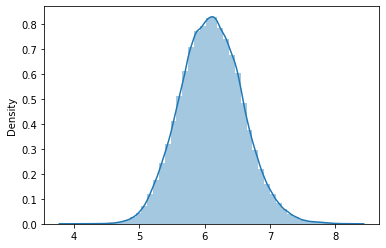

0.12789003289438944
Fold 1 end
Fold 2 start
(3074513, 22)
y dist plot


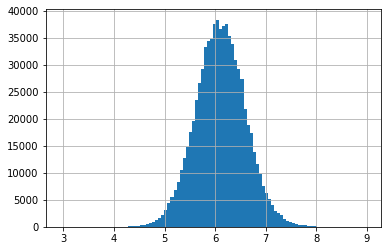

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3947
[LightGBM] [Info] Number of data points in the train set: 3074513, number of used features: 22


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6.107931
Training until validation scores don't improve for 100 rounds
[50]	valid_0's huber: 0.0175368
[100]	valid_0's huber: 0.0154521
[150]	valid_0's huber: 0.014278
[200]	valid_0's huber: 0.0135531
[250]	valid_0's huber: 0.0130853
[300]	valid_0's huber: 0.0126611
[350]	valid_0's huber: 0.0122738
[400]	valid_0's huber: 0.0119849
[450]	valid_0's huber: 0.0117508
[500]	valid_0's huber: 0.0115585
[550]	valid_0's huber: 0.0113823
[600]	valid_0's huber: 0.0112463
[650]	valid_0's huber: 0.0111084
[700]	valid_0's huber: 0.0109551
[750]	valid_0's huber: 0.0108346
[800]	valid_0's huber: 0.0107187
[850]	valid_0's huber: 0.0106215
[900]	valid_0's huber: 0.0105265
[950]	valid_0's huber: 0.0104522
[1000]	valid_0's huber: 0.01038
[1050]	valid_0's huber: 0.0103129
[1100]	valid_0's huber: 0.0102439
[1150]	valid_0's huber: 0.010188
[1200]	valid_0's huber: 0.0101323
[1250]	valid_0's huber: 0.0100769
[1300]	valid_0's huber: 0.0100217
[1350]	valid_0's huber: 0

[11650]	valid_0's huber: 0.00818707
[11700]	valid_0's huber: 0.00818517
[11750]	valid_0's huber: 0.00818387
[11800]	valid_0's huber: 0.00818252
[11850]	valid_0's huber: 0.00818228
[11900]	valid_0's huber: 0.00818058
[11950]	valid_0's huber: 0.00817915
[12000]	valid_0's huber: 0.00817857
[12050]	valid_0's huber: 0.00817702
[12100]	valid_0's huber: 0.00817488
[12150]	valid_0's huber: 0.00817345
[12200]	valid_0's huber: 0.00817249
[12250]	valid_0's huber: 0.00817191
[12300]	valid_0's huber: 0.00817036
[12350]	valid_0's huber: 0.00816914
[12400]	valid_0's huber: 0.00816882
[12450]	valid_0's huber: 0.00816809
[12500]	valid_0's huber: 0.00816708
[12550]	valid_0's huber: 0.00816518
[12600]	valid_0's huber: 0.00816426
[12650]	valid_0's huber: 0.00816362
[12700]	valid_0's huber: 0.00816319
[12750]	valid_0's huber: 0.00816241
[12800]	valid_0's huber: 0.00816159
[12850]	valid_0's huber: 0.00816053
[12900]	valid_0's huber: 0.00815976
[12950]	valid_0's huber: 0.00815951
[13000]	valid_0's huber: 0.0

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


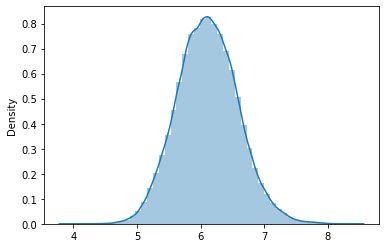

0.12764185094081987
Fold 2 end
Fold 3 start
(3074513, 22)
y dist plot


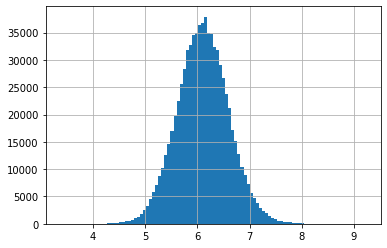

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3944
[LightGBM] [Info] Number of data points in the train set: 3074513, number of used features: 22


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6.107993
Training until validation scores don't improve for 100 rounds
[50]	valid_0's huber: 0.0175766
[100]	valid_0's huber: 0.0154475
[150]	valid_0's huber: 0.0143483
[200]	valid_0's huber: 0.0136172
[250]	valid_0's huber: 0.0130682
[300]	valid_0's huber: 0.0126394
[350]	valid_0's huber: 0.0122955
[400]	valid_0's huber: 0.0119939
[450]	valid_0's huber: 0.0117579
[500]	valid_0's huber: 0.0115559
[550]	valid_0's huber: 0.0113912
[600]	valid_0's huber: 0.0112284
[650]	valid_0's huber: 0.0110871
[700]	valid_0's huber: 0.0109738
[750]	valid_0's huber: 0.010843
[800]	valid_0's huber: 0.0107282
[850]	valid_0's huber: 0.0106238
[900]	valid_0's huber: 0.0105277
[950]	valid_0's huber: 0.0104439
[1000]	valid_0's huber: 0.0103574
[1050]	valid_0's huber: 0.0102788
[1100]	valid_0's huber: 0.0102075
[1150]	valid_0's huber: 0.0101425
[1200]	valid_0's huber: 0.0100872
[1250]	valid_0's huber: 0.0100361
[1300]	valid_0's huber: 0.00998045
[1350]	valid_0's hube

[11650]	valid_0's huber: 0.00815807
[11700]	valid_0's huber: 0.00815695
[11750]	valid_0's huber: 0.0081565
[11800]	valid_0's huber: 0.00815509
[11850]	valid_0's huber: 0.00815467
[11900]	valid_0's huber: 0.0081541
[11950]	valid_0's huber: 0.00815267
[12000]	valid_0's huber: 0.00815189
[12050]	valid_0's huber: 0.00815077
[12100]	valid_0's huber: 0.00814958
[12150]	valid_0's huber: 0.00814917
[12200]	valid_0's huber: 0.00814885
[12250]	valid_0's huber: 0.00814757
[12300]	valid_0's huber: 0.00814687
[12350]	valid_0's huber: 0.00814501
[12400]	valid_0's huber: 0.00814377
[12450]	valid_0's huber: 0.00814159
[12500]	valid_0's huber: 0.00814024
[12550]	valid_0's huber: 0.00813952
[12600]	valid_0's huber: 0.00813816
[12650]	valid_0's huber: 0.00813669
[12700]	valid_0's huber: 0.00813554
[12750]	valid_0's huber: 0.00813428
[12800]	valid_0's huber: 0.00813403
[12850]	valid_0's huber: 0.00813238
[12900]	valid_0's huber: 0.00813166
[12950]	valid_0's huber: 0.00813089
[13000]	valid_0's huber: 0.008

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


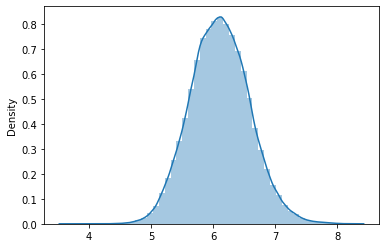

0.12737774585528222
Fold 3 end
Fold 4 start
(3074513, 22)
y dist plot


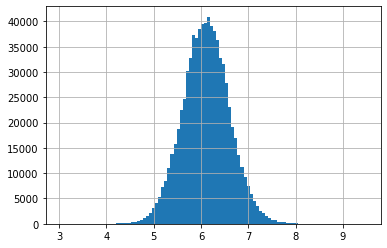

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3943
[LightGBM] [Info] Number of data points in the train set: 3074513, number of used features: 22


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6.107846
Training until validation scores don't improve for 100 rounds
[50]	valid_0's huber: 0.0174025
[100]	valid_0's huber: 0.0153979
[150]	valid_0's huber: 0.0143233
[200]	valid_0's huber: 0.0135627
[250]	valid_0's huber: 0.01305
[300]	valid_0's huber: 0.0125874
[350]	valid_0's huber: 0.0122723
[400]	valid_0's huber: 0.0119612
[450]	valid_0's huber: 0.0117369
[500]	valid_0's huber: 0.0115043
[550]	valid_0's huber: 0.0113493
[600]	valid_0's huber: 0.011178
[650]	valid_0's huber: 0.011034
[700]	valid_0's huber: 0.0108817
[750]	valid_0's huber: 0.0107819
[800]	valid_0's huber: 0.0106754
[850]	valid_0's huber: 0.0105716
[900]	valid_0's huber: 0.010481
[950]	valid_0's huber: 0.0103958
[1000]	valid_0's huber: 0.0103218
[1050]	valid_0's huber: 0.0102558
[1100]	valid_0's huber: 0.0101774
[1150]	valid_0's huber: 0.0101088
[1200]	valid_0's huber: 0.0100443
[1250]	valid_0's huber: 0.00998525
[1300]	valid_0's huber: 0.00992568
[1350]	valid_0's huber: 

[11650]	valid_0's huber: 0.00812434
[11700]	valid_0's huber: 0.00812345
[11750]	valid_0's huber: 0.00812271
[11800]	valid_0's huber: 0.00812242
[11850]	valid_0's huber: 0.00812164
[11900]	valid_0's huber: 0.00812058
[11950]	valid_0's huber: 0.00811978
[12000]	valid_0's huber: 0.00811861
[12050]	valid_0's huber: 0.00811803
[12100]	valid_0's huber: 0.00811724
[12150]	valid_0's huber: 0.00811586
[12200]	valid_0's huber: 0.00811529
[12250]	valid_0's huber: 0.00811426
[12300]	valid_0's huber: 0.00811314
[12350]	valid_0's huber: 0.00811184
[12400]	valid_0's huber: 0.00811113
[12450]	valid_0's huber: 0.00811015
[12500]	valid_0's huber: 0.00810883
[12550]	valid_0's huber: 0.00810742
[12600]	valid_0's huber: 0.00810672
[12650]	valid_0's huber: 0.00810598
[12700]	valid_0's huber: 0.00810389
[12750]	valid_0's huber: 0.00810346
[12800]	valid_0's huber: 0.00810193
[12850]	valid_0's huber: 0.00810088
[12900]	valid_0's huber: 0.0081002
[12950]	valid_0's huber: 0.00809951
[13000]	valid_0's huber: 0.00

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


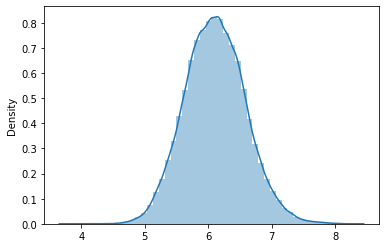

0.1271529524903569
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [16]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['target_area_log']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['target_area_log']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'huber',
        'alpha': 1.35,
        'learning_rate': 0.3,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'huber',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 50000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_huber_shap_top_22_lr_3_target_log_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.distplot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

In [17]:
np.sqrt(mean_squared_error(training_data_df['target_area_log'], oof))

0.12756907823812788

Fold 0 start
(3074512, 22)
y dist plot


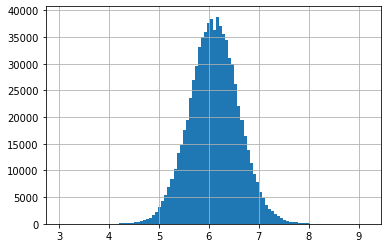

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3941
[LightGBM] [Info] Number of data points in the train set: 3074512, number of used features: 22
[LightGBM] [Info] Start training from score 6.108187
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.18749
[100]	valid_0's rmse: 0.175804
[150]	valid_0's rmse: 0.168973
[200]	valid_0's rmse: 0.164519
[250]	valid_0's rmse: 0.161599
[300]	valid_0's rmse: 0.15895
[350]	valid_0's rmse: 0.156915
[400]	valid_0's rmse: 0.15513
[450]	valid_0's rmse: 0.153533
[500]	valid_0's rmse: 0.15211
[550]	valid_0's rmse: 0.151027
[600]	valid_0's rmse: 0.149928
[650]	valid_0's rmse: 0.148771
[700]	valid_0's rmse: 0.147946
[750]	valid_0's rmse: 0.147194
[800]	valid_0's rmse: 0.146563
[850]	valid_0's rmse: 0.145874
[900]

[12150]	valid_0's rmse: 0.128127
[12200]	valid_0's rmse: 0.128119
[12250]	valid_0's rmse: 0.128108
[12300]	valid_0's rmse: 0.128104
[12350]	valid_0's rmse: 0.128088
[12400]	valid_0's rmse: 0.128084
[12450]	valid_0's rmse: 0.12808
[12500]	valid_0's rmse: 0.128073
[12550]	valid_0's rmse: 0.128064
[12600]	valid_0's rmse: 0.128061
[12650]	valid_0's rmse: 0.128052
[12700]	valid_0's rmse: 0.128049
[12750]	valid_0's rmse: 0.128045
[12800]	valid_0's rmse: 0.128041
[12850]	valid_0's rmse: 0.128039
[12900]	valid_0's rmse: 0.128036
[12950]	valid_0's rmse: 0.128034
[13000]	valid_0's rmse: 0.12803
[13050]	valid_0's rmse: 0.128025
[13100]	valid_0's rmse: 0.128026
[13150]	valid_0's rmse: 0.128024
[13200]	valid_0's rmse: 0.128014
[13250]	valid_0's rmse: 0.128011
[13300]	valid_0's rmse: 0.127999
[13350]	valid_0's rmse: 0.127994
[13400]	valid_0's rmse: 0.127988
[13450]	valid_0's rmse: 0.127984
[13500]	valid_0's rmse: 0.127976
[13550]	valid_0's rmse: 0.127972
[13600]	valid_0's rmse: 0.127971
[13650]	vali

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


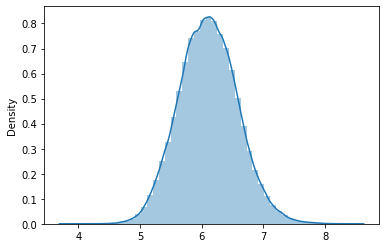

0.12795253290514091
Fold 0 end
Fold 1 start
(3074513, 22)
y dist plot


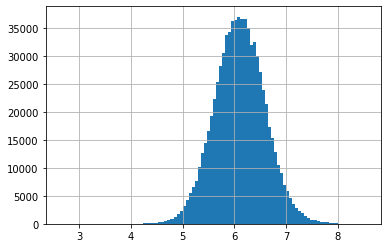

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3945
[LightGBM] [Info] Number of data points in the train set: 3074513, number of used features: 22


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6.108200
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.187176
[100]	valid_0's rmse: 0.175312
[150]	valid_0's rmse: 0.16885
[200]	valid_0's rmse: 0.164396
[250]	valid_0's rmse: 0.161296
[300]	valid_0's rmse: 0.158789
[350]	valid_0's rmse: 0.15671
[400]	valid_0's rmse: 0.154823
[450]	valid_0's rmse: 0.153467
[500]	valid_0's rmse: 0.151951
[550]	valid_0's rmse: 0.150727
[600]	valid_0's rmse: 0.149703
[650]	valid_0's rmse: 0.14881
[700]	valid_0's rmse: 0.147931
[750]	valid_0's rmse: 0.147147
[800]	valid_0's rmse: 0.146472
[850]	valid_0's rmse: 0.145789
[900]	valid_0's rmse: 0.145278
[950]	valid_0's rmse: 0.144677
[1000]	valid_0's rmse: 0.144077
[1050]	valid_0's rmse: 0.143606
[1100]	valid_0's rmse: 0.143147
[1150]	valid_0's rmse: 0.14278
[1200]	valid_0's rmse: 0.142371
[1250]	valid_0's rmse: 0.141925
[1300]	valid_0's rmse: 0.141537
[1350]	valid_0's rmse: 0.141284
[1400]	valid_0's rmse: 0.140961
[1450]	valid_

[12700]	valid_0's rmse: 0.128153
[12750]	valid_0's rmse: 0.128144
[12800]	valid_0's rmse: 0.128138
[12850]	valid_0's rmse: 0.128133
[12900]	valid_0's rmse: 0.128117
[12950]	valid_0's rmse: 0.128108
[13000]	valid_0's rmse: 0.128104
[13050]	valid_0's rmse: 0.128088
[13100]	valid_0's rmse: 0.12808
[13150]	valid_0's rmse: 0.12808
[13200]	valid_0's rmse: 0.128075
[13250]	valid_0's rmse: 0.128066
[13300]	valid_0's rmse: 0.128056
[13350]	valid_0's rmse: 0.128051
[13400]	valid_0's rmse: 0.128045
[13450]	valid_0's rmse: 0.128033
[13500]	valid_0's rmse: 0.128031
[13550]	valid_0's rmse: 0.128027
[13600]	valid_0's rmse: 0.128024
[13650]	valid_0's rmse: 0.128016
[13700]	valid_0's rmse: 0.128007
[13750]	valid_0's rmse: 0.128004
[13800]	valid_0's rmse: 0.128001
[13850]	valid_0's rmse: 0.127997
[13900]	valid_0's rmse: 0.127987
[13950]	valid_0's rmse: 0.127984
[14000]	valid_0's rmse: 0.127984
[14050]	valid_0's rmse: 0.127977
[14100]	valid_0's rmse: 0.127974
[14150]	valid_0's rmse: 0.127969
[14200]	vali

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


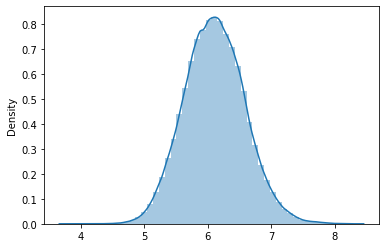

0.12780679008548174
Fold 1 end
Fold 2 start
(3074513, 22)
y dist plot


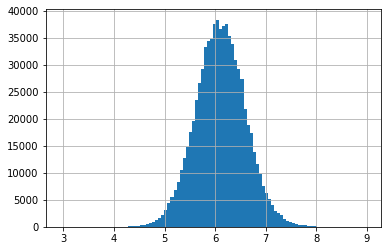

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3947
[LightGBM] [Info] Number of data points in the train set: 3074513, number of used features: 22


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6.107931
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.186778
[100]	valid_0's rmse: 0.175488
[150]	valid_0's rmse: 0.169166
[200]	valid_0's rmse: 0.164739
[250]	valid_0's rmse: 0.161276
[300]	valid_0's rmse: 0.158767
[350]	valid_0's rmse: 0.156783
[400]	valid_0's rmse: 0.154934
[450]	valid_0's rmse: 0.153381
[500]	valid_0's rmse: 0.151999
[550]	valid_0's rmse: 0.150891
[600]	valid_0's rmse: 0.149927
[650]	valid_0's rmse: 0.149026
[700]	valid_0's rmse: 0.14814
[750]	valid_0's rmse: 0.147475
[800]	valid_0's rmse: 0.146756
[850]	valid_0's rmse: 0.146153
[900]	valid_0's rmse: 0.145518
[950]	valid_0's rmse: 0.14496
[1000]	valid_0's rmse: 0.14446
[1050]	valid_0's rmse: 0.143959
[1100]	valid_0's rmse: 0.143498
[1150]	valid_0's rmse: 0.143069
[1200]	valid_0's rmse: 0.142581
[1250]	valid_0's rmse: 0.142193
[1300]	valid_0's rmse: 0.141733
[1350]	valid_0's rmse: 0.141346
[1400]	valid_0's rmse: 0.140989
[1450]	valid

In [ ]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['target_area_log']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['target_area_log']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'regression',
        'learning_rate': 0.3,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'rmse',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 50000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_mse_shap_top_22_lr_3_target_log_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.distplot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

In [ ]:
np.sqrt(mean_squared_error(training_data_df['target_area_log'], oof))